Saving closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head.jpg to closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head.jpg


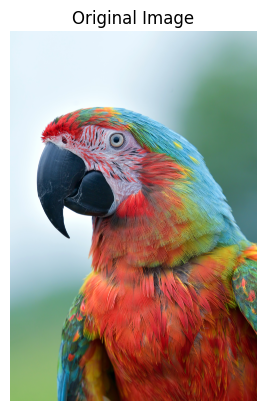

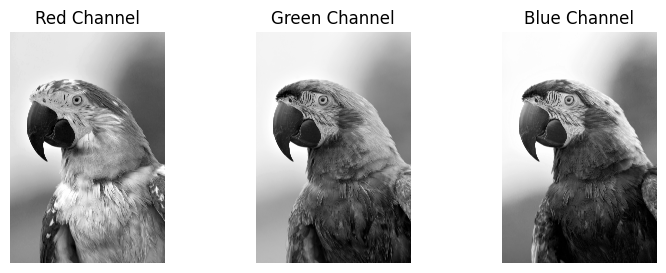

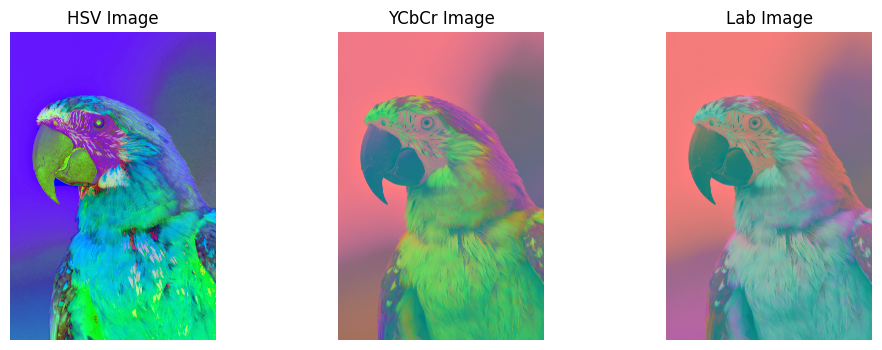

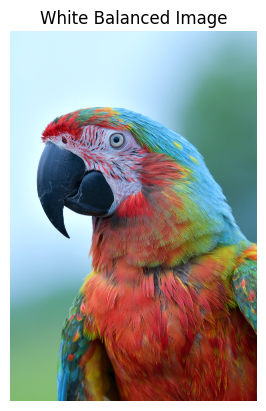

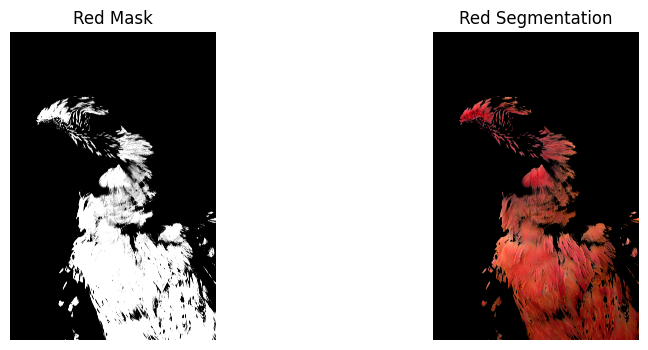

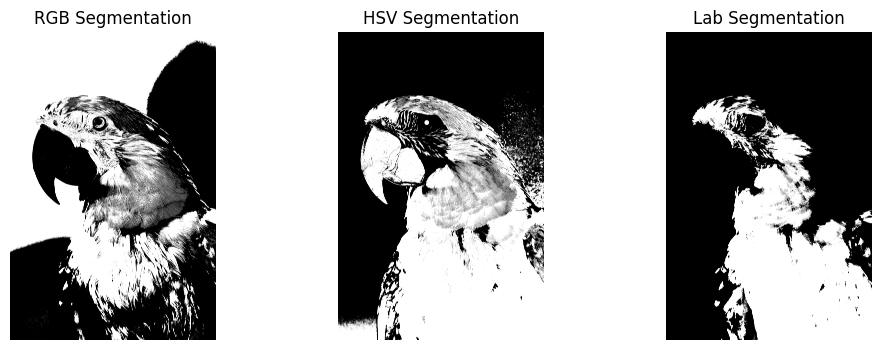

In [ ]:
# LAB 9: COLOR IMAGE PROCESSING
# Works on Colab / Jupyter / Local Python

import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Upload Image (Colab-Friendly)
# -----------------------------
try:
    from google.colab import files
    uploaded = files.upload()  # upload your image here
    img = cv2.imdecode(np.frombuffer(list(uploaded.values())[0], np.uint8), cv2.IMREAD_COLOR)
except:
    # For local Python / Jupyter, put the image in the same folder
    img = cv2.imread('image.jpg')
    if img is None:
        raise FileNotFoundError("Image not found. Please check the file path.")

# Convert BGR → RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# -----------------------------
# 2. Extract R, G, B Channels
# -----------------------------
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title("Blue Channel")
plt.axis('off')
plt.show()

# -----------------------------
# 3. Convert RGB → HSV, YCbCr, Lab
# -----------------------------
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(hsv)
plt.title("HSV Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(ycbcr)
plt.title("YCbCr Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(lab)
plt.title("Lab Image")
plt.axis('off')
plt.show()

# -----------------------------
# 4. White Balance (Gray World)
# -----------------------------
wb = img.astype(np.float32)
avgR = np.mean(wb[:,:,0])
avgG = np.mean(wb[:,:,1])
avgB = np.mean(wb[:,:,2])
avgGray = (avgR + avgG + avgB) / 3

wb[:,:,0] = wb[:,:,0] * (avgGray / avgR)
wb[:,:,1] = wb[:,:,1] * (avgGray / avgG)
wb[:,:,2] = wb[:,:,2] * (avgGray / avgB)

wb = np.clip(wb, 0, 255).astype(np.uint8)

plt.imshow(wb)
plt.title("White Balanced Image")
plt.axis('off')
plt.show()

# -----------------------------
# 5. Color Masking (Red Color Example)
# -----------------------------
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

mask1 = cv2.inRange(hsv_img, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_img, lower_red2, upper_red2)

red_mask = cv2.bitwise_or(mask1, mask2)
red_segment = cv2.bitwise_and(img, img, mask=red_mask)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(red_mask, cmap='gray')
plt.title("Red Mask")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(red_segment)
plt.title("Red Segmentation")
plt.axis('off')
plt.show()

# -----------------------------
# 6. Segmentation Comparison
# -----------------------------
# RGB Segmentation (threshold R channel)
_, rgb_seg = cv2.threshold(R, 150, 255, cv2.THRESH_BINARY)

# HSV Segmentation (threshold S channel)
S = hsv[:,:,1]
_, hsv_seg = cv2.threshold(S, 100, 255, cv2.THRESH_BINARY)

# Lab Segmentation (threshold 'a' channel)
a_channel = lab[:,:,1]
_, lab_seg = cv2.threshold(a_channel, 140, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(rgb_seg, cmap='gray')
plt.title("RGB Segmentation")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(hsv_seg, cmap='gray')
plt.title("HSV Segmentation")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(lab_seg, cmap='gray')
plt.title("Lab Segmentation")
plt.axis('off')
plt.show()


Saving LOIN.PNG to LOIN.PNG


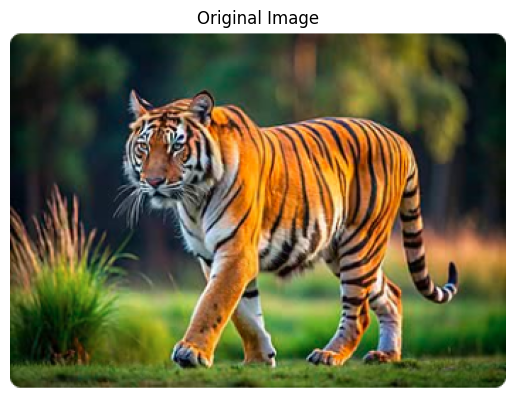

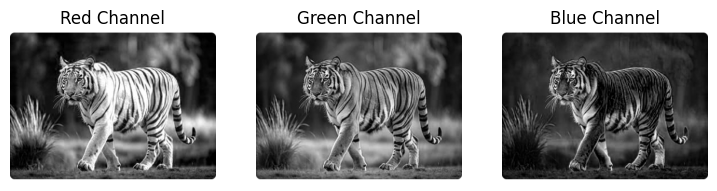

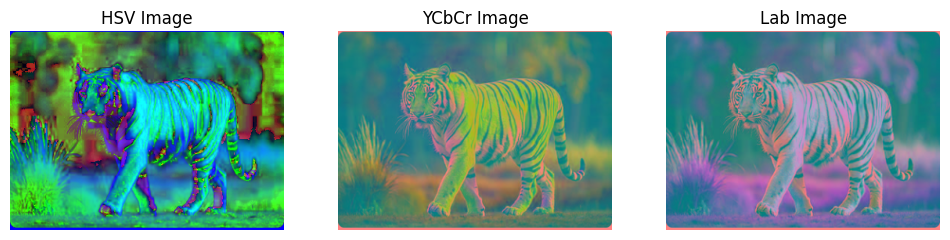

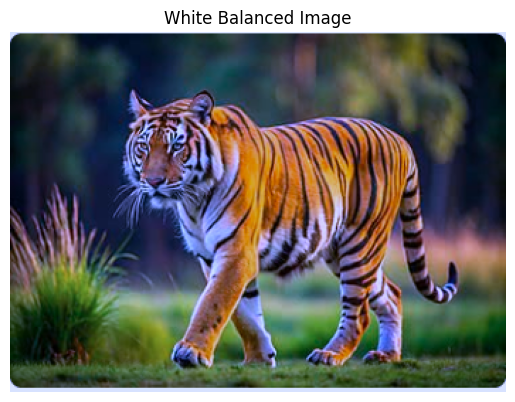

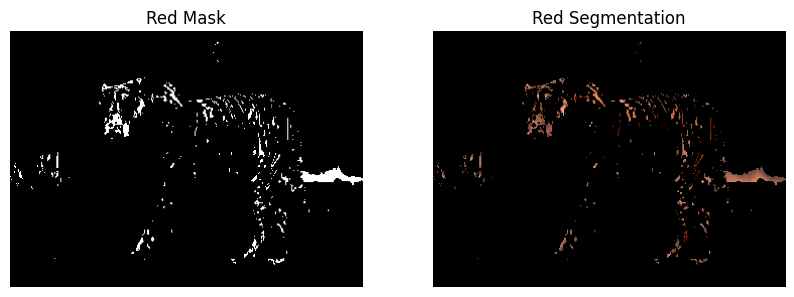

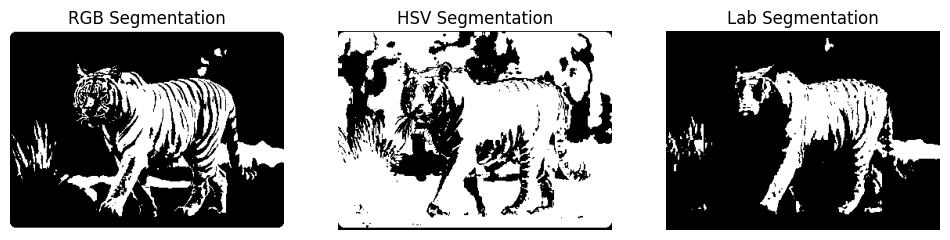

In [ ]:
# LAB 9: COLOR IMAGE PROCESSING
# Works on Colab / Jupyter / Local Python

import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Upload Image (Colab-Friendly)
# -----------------------------
try:
    from google.colab import files
    uploaded = files.upload()  # upload your image here
    img = cv2.imdecode(np.frombuffer(list(uploaded.values())[0], np.uint8), cv2.IMREAD_COLOR)
except:
    # For local Python / Jupyter, put the image in the same folder
    img = cv2.imread('image.jpg')
    if img is None:
        raise FileNotFoundError("Image not found. Please check the file path.")

# Convert BGR → RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# -----------------------------
# 2. Extract R, G, B Channels
# -----------------------------
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title("Blue Channel")
plt.axis('off')
plt.show()

# -----------------------------
# 3. Convert RGB → HSV, YCbCr, Lab
# -----------------------------
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(hsv)
plt.title("HSV Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(ycbcr)
plt.title("YCbCr Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(lab)
plt.title("Lab Image")
plt.axis('off')
plt.show()

# -----------------------------
# 4. White Balance (Gray World)
# -----------------------------
wb = img.astype(np.float32)
avgR = np.mean(wb[:,:,0])
avgG = np.mean(wb[:,:,1])
avgB = np.mean(wb[:,:,2])
avgGray = (avgR + avgG + avgB) / 3

wb[:,:,0] = wb[:,:,0] * (avgGray / avgR)
wb[:,:,1] = wb[:,:,1] * (avgGray / avgG)
wb[:,:,2] = wb[:,:,2] * (avgGray / avgB)

wb = np.clip(wb, 0, 255).astype(np.uint8)

plt.imshow(wb)
plt.title("White Balanced Image")
plt.axis('off')
plt.show()

# -----------------------------
# 5. Color Masking (Red Color Example)
# -----------------------------
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

mask1 = cv2.inRange(hsv_img, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_img, lower_red2, upper_red2)

red_mask = cv2.bitwise_or(mask1, mask2)
red_segment = cv2.bitwise_and(img, img, mask=red_mask)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(red_mask, cmap='gray')
plt.title("Red Mask")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(red_segment)
plt.title("Red Segmentation")
plt.axis('off')
plt.show()

# -----------------------------
# 6. Segmentation Comparison
# -----------------------------
# RGB Segmentation (threshold R channel)
_, rgb_seg = cv2.threshold(R, 150, 255, cv2.THRESH_BINARY)

# HSV Segmentation (threshold S channel)
S = hsv[:,:,1]
_, hsv_seg = cv2.threshold(S, 100, 255, cv2.THRESH_BINARY)

# Lab Segmentation (threshold 'a' channel)
a_channel = lab[:,:,1]
_, lab_seg = cv2.threshold(a_channel, 140, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(rgb_seg, cmap='gray')
plt.title("RGB Segmentation")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(hsv_seg, cmap='gray')
plt.title("HSV Segmentation")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(lab_seg, cmap='gray')
plt.title("Lab Segmentation")
plt.axis('off')
plt.show()